In [110]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.simplefilter("ignore")             # even stronger

In [111]:
xle = yf.download("XLE", start="2005-01-01", end="2025-12-30")
oil = yf.download("CL=F", start="2005-01-01", end="2025-12-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [112]:
df = pd.concat([xle, oil], axis=1)

In [113]:
df.Close["CL=F"]

Date
2005-01-03    42.119999
2005-01-04    43.910000
2005-01-05    43.389999
2005-01-06    45.560001
2005-01-07    45.430000
                ...    
2025-12-22    58.009998
2025-12-23    58.380001
2025-12-24    58.349998
2025-12-26    56.740002
2025-12-29    58.080002
Name: CL=F, Length: 5285, dtype: float64

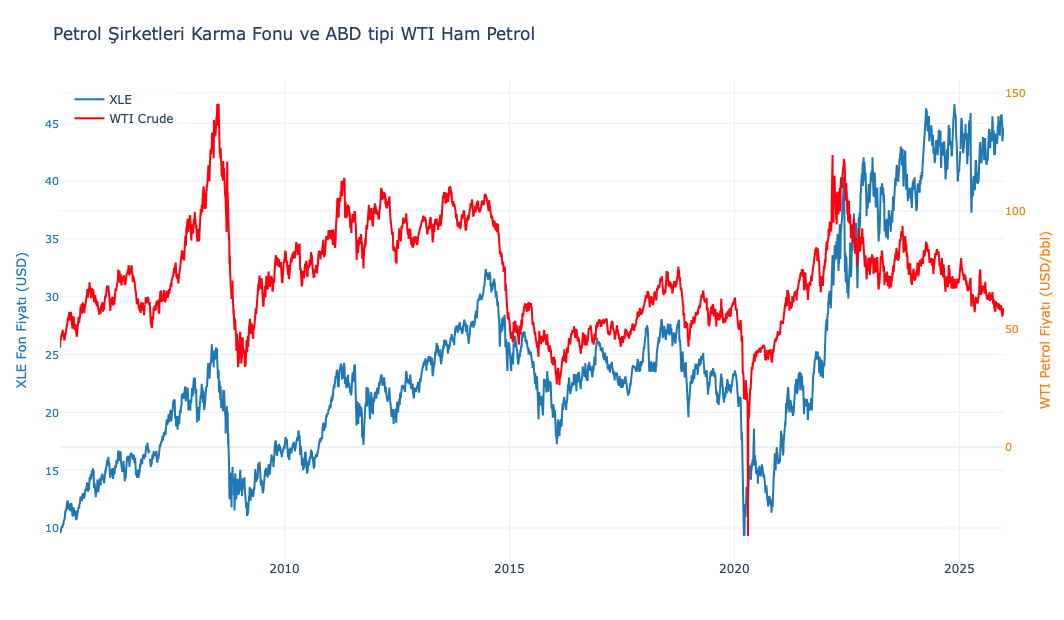

In [114]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index, y=df.Close['XLE'], name='XLE', line=dict(color='#1f77b4', width=2)))

fig.add_trace(go.Scatter(
    x=df.index, y=df.Close['CL=F'], name='WTI Crude', yaxis='y2',
    line=dict(color='#ff000e', width=2)))

# Professional layout
fig.update_layout(
    title='Petrol Şirketleri Karma Fonu ve ABD tipi WTI Ham Petrol',
    xaxis_title='',
    yaxis=dict(
        title='XLE Fon Fiyatı (USD)',
        title_font=dict(color='#1f77b4', size=13),     # ← correct property
        tickfont=dict(color='#1f77b4', size=11),       # tick labels
    ),
    yaxis2=dict(
        title='WTI Petrol Fiyatı (USD/bbl)',
        title_font=dict(color='#ff7f0e', size=13),     # ← correct property
        tickfont=dict(color='#ff7f0e', size=11),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(255,255,255,0.8)'),
    hovermode='x unified',
    template='plotly_white',
    height=620,
    margin=dict(l=60, r=60, t=80, b=60)
)

fig.show()


In [115]:
import yfinance as yf
import pandas as pd

vg = yf.download("VG", start="2025-01-01", end="2025-12-30", progress=False)
hh = yf.download("NG=F", start="2025-01-01", end="2025-12-30", progress=False)
ttf = yf.download("TTF=F", start="2025-01-01", end="2025-12-30", progress=False)
ttf.Close=ttf.Close*0.34456


In [116]:
prices = pd.concat([vg.Close, hh.Close, ttf.Close], axis=1)
prices=prices.dropna()

In [117]:
prices["TTF-HH"]=prices["TTF=F"]-prices["NG=F"]

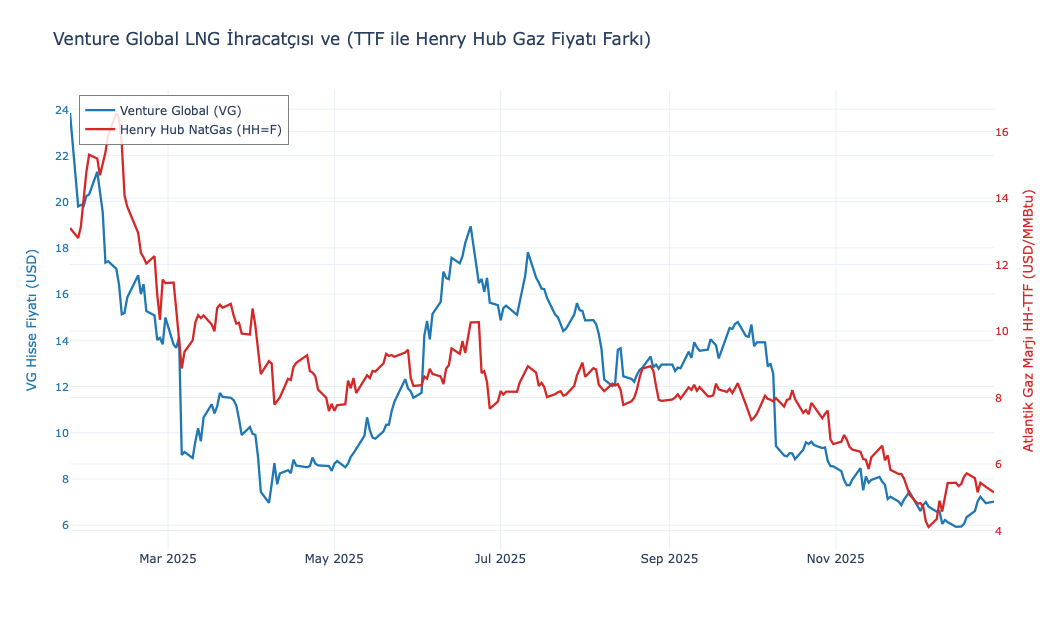

In [118]:
# Create figure
fig = go.Figure()

# Add VG trace (left axis)
fig.add_trace(go.Scatter(
    x=prices.index,
    y=prices['VG'],
    name='Venture Global (VG)',
    line=dict(color='#1f77b4', width=2.3)
))

# Add HH=F trace (right axis)
fig.add_trace(go.Scatter(
    x=prices.index,
    y=prices['TTF-HH'],
    name='Henry Hub NatGas (HH=F)',
    yaxis='y2',
    line=dict(color='#d62728', width=2.3)   # red tone for commodity
))

# Layout for professional look
fig.update_layout(
    title='Venture Global LNG İhracatçısı ve (TTF ile Henry Hub Gaz Fiyatı Farkı)',
    xaxis_title='',
    yaxis=dict(
        title='VG Hisse Fiyatı (USD)',
        title_font=dict(color='#1f77b4', size=13),
        tickfont=dict(color='#1f77b4', size=11)
    ),
    yaxis2=dict(
        title='Atlantik Gaz Marjı HH-TTF (USD/MMBtu)',
        title_font=dict(color='#d62728', size=13),
        tickfont=dict(color='#d62728', size=11),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(255,255,255,0.85)', bordercolor='gray', borderwidth=1),
    hovermode='x unified',
    template='plotly_white',
    height=620,
    margin=dict(l=70, r=70, t=90, b=70)
)

fig.show()

In [119]:
prices.tail

<bound method NDFrame.tail of Ticker             VG   NG=F      TTF=F     TTF-HH
Date                                              
2025-01-24  23.834463  4.027  17.125321  13.098321
2025-01-27  19.792536  3.697  16.491331  12.794331
2025-01-28  19.862053  3.471  16.616061  13.145061
2025-01-29  19.812397  3.535  17.626311  14.091311
2025-01-30  20.239429  3.047  17.822711  14.775711
...               ...    ...        ...        ...
2025-12-22   6.610000  3.965   9.539833   5.574833
2025-12-23   7.030000  4.408   9.555338   5.147338
2025-12-24   7.230000  4.242   9.680413   5.438413
2025-12-26   6.950000  4.366   9.680413   5.314413
2025-12-29   7.020000  4.687   9.831675   5.144675

[234 rows x 4 columns]>